Name: Tanvi Vishal Tonge

PRN: 202201070053

Batch: 1

##**Logistic Regression implementation from scratch**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("diabetes.csv")

# Split data into features and target
X = df.iloc[:, :-1].values  # All columns except the last one
y = df.iloc[:, -1].values   # Last column as target

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Compute cost function
def compute_cost(X, y, weights):
    m = len(y)
    h = sigmoid(X @ weights)
    cost = (-1/m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
    return cost

# Gradient Descent
def gradient_descent(X, y, weights, lr, epochs):
    m = len(y)
    for _ in range(epochs):
        h = sigmoid(X @ weights)
        gradient = (1/m) * X.T @ (h - y)
        weights -= lr * gradient
    return weights

# Add bias term
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Initialize weights
weights = np.zeros(X_train_bias.shape[1])

# Train model
weights = gradient_descent(X_train_bias, y_train, weights, lr=0.01, epochs=1000)

# Predictions
y_pred = sigmoid(X_test_bias @ weights) >= 0.5

# Accuracy

accuracy = np.mean(y_pred == y_test)

print(f"Accuracy (Scratch): {accuracy:.4f}")


Accuracy (Scratch): 0.7338


##**Logistic Regression implementation using library**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("diabetes.csv")

# Split data into features and target
X = df.iloc[:, :-1].values  # All columns except the last one
y = df.iloc[:, -1].values   # Last column as target

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred_sklearn = model.predict(X_test)

# Accuracy
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Accuracy (sklearn): {accuracy_sklearn:.4f}")

# Compute confusion matrix
conf_matrix_sklearn = confusion_matrix(y_test, y_pred_sklearn)
print("Confusion Matrix (sklearn):\n", conf_matrix_sklearn)

# Classification report
class_report = classification_report(y_test, y_pred_sklearn)
print("Classification Report:\n", class_report)


Accuracy (sklearn): 0.7532
Confusion Matrix (sklearn):
 [[79 20]
 [18 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



##**Activation Functions**

#**SIGMOID**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_sigmoid():
    x = np.linspace(-10, 10, 100)
    y = 1 / (1 + np.exp(-x))
    plt.plot(x, y)
    plt.xlabel('Input')
    plt.ylabel('Sigmoid Output')
    plt.title('Sigmoid Activation Function')
    plt.grid(True)
    plt.show()


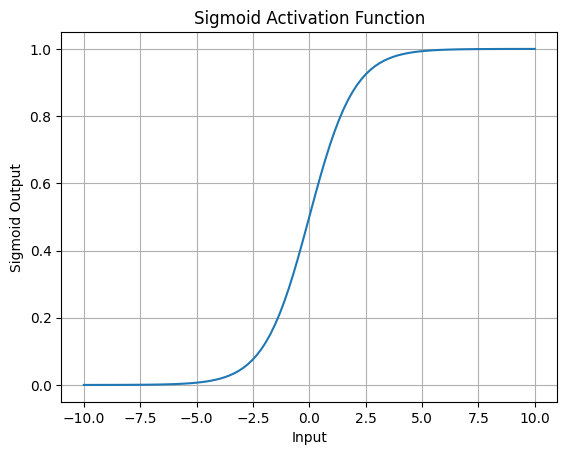

In [ ]:
   plot_sigmoid()

#**TANH**

In [ ]:
import math
def tanh(x):
  return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

In [ ]:
tanh(x=-50)

-1.0

In [ ]:
tanh(2.5)

0.9866142981514304

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_tanh():
    # Generate values for x
    x = np.linspace(-10, 10, 100)

    # Compute tanh values for corresponding x
    tanh = np.tanh(x)

    # Plot the tanh function
    plt.plot(x, tanh)
    plt.title("Tanh Activation Function")
    plt.xlabel("x")
    plt.ylabel("tanh(x)")
    plt.grid(True)
    plt.show()

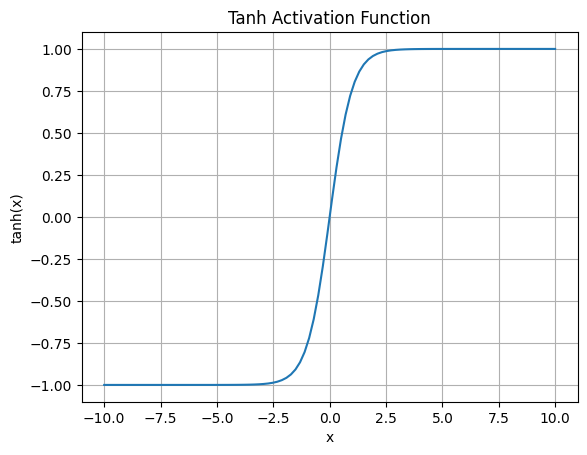

In [ ]:
    plot_tanh()

#**RELU**

In [ ]:
def relu(x):
  return max(0,x)

In [ ]:
relu(-100)

0

In [ ]:
relu(8)

8

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_relu():
    # Generate values for x
    x = np.linspace(-10, 10, 100)

    # Compute ReLU values for corresponding x
    relu = np.maximum(0, x)

    # Plot the ReLU function
    plt.plot(x, relu)
    plt.title("ReLU Activation Function")
    plt.xlabel("x")
    plt.ylabel("ReLU(x)")
    plt.grid(True)
    plt.show()

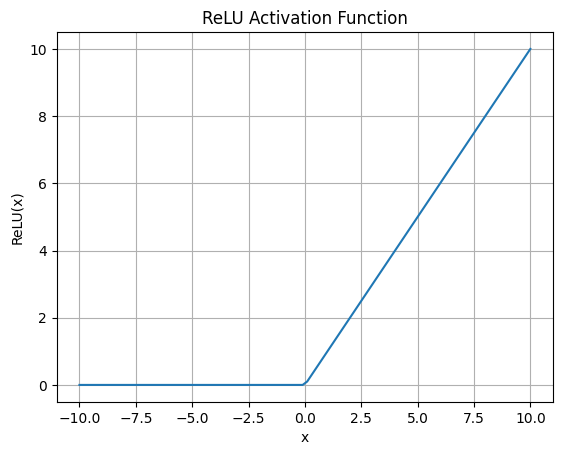

In [ ]:
plot_relu()

##**Log Loss function**

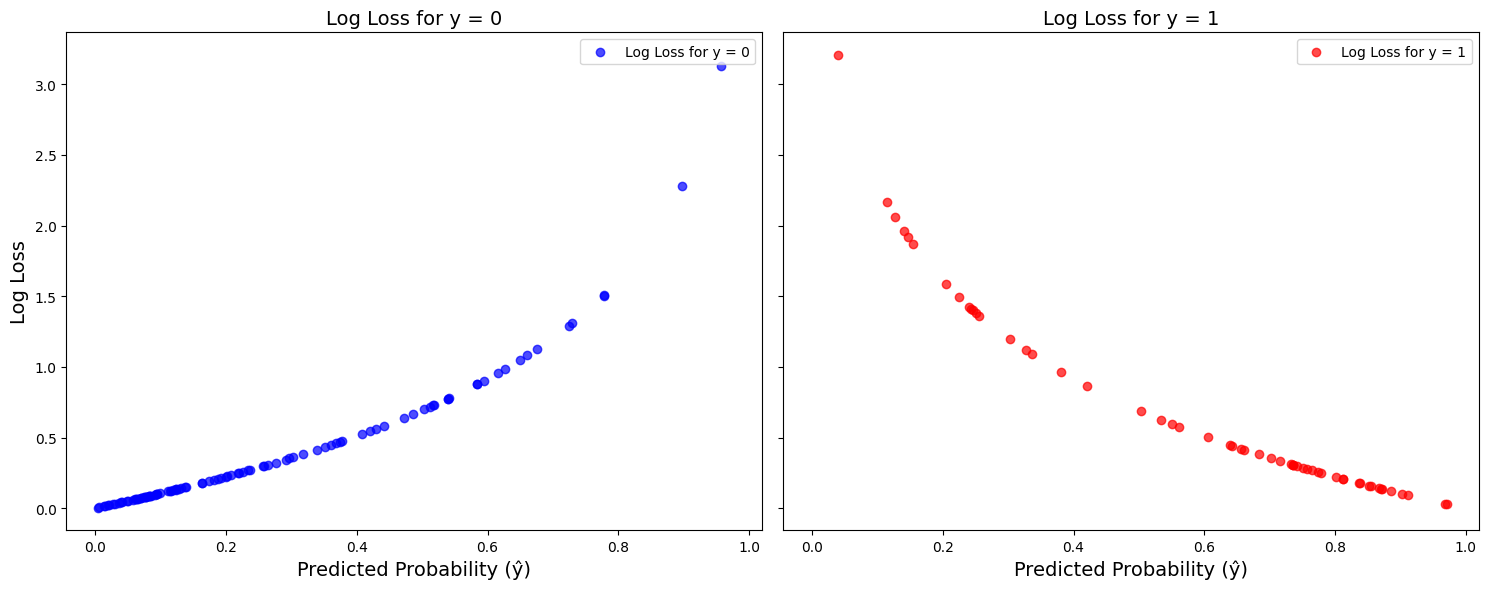

Actual Log Loss: 0.5117


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("diabetes.csv")

# Split dataset
X = df.drop(columns=['Outcome'])
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of class 1

# Compute log loss using the given formula
losses = - (y_test * np.log(y_prob)) - ((1 - y_test) * np.log(1 - y_prob))

# Separate losses based on actual labels (y_test)
y_0_prob = y_prob[y_test == 0]
y_1_prob = y_prob[y_test == 1]
loss_0 = losses[y_test == 0]  # Log loss for y = 0
loss_1 = losses[y_test == 1]  # Log loss for y = 1

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharex=True, sharey=True)

# Log Loss for y = 0
ax[0].scatter(y_0_prob, loss_0, color='blue', alpha=0.7, label="Log Loss for y = 0")
ax[0].set_title("Log Loss for y = 0", fontsize=14)
ax[0].set_xlabel("Predicted Probability (ŷ)", fontsize=14)
ax[0].set_ylabel("Log Loss", fontsize=14)
ax[0].legend()

# Log Loss for y = 1
ax[1].scatter(y_1_prob, loss_1, color='red', alpha=0.7, label="Log Loss for y = 1")
ax[1].set_title("Log Loss for y = 1", fontsize=14)
ax[1].set_xlabel("Predicted Probability (ŷ)", fontsize=14)
ax[1].legend()

plt.tight_layout()
plt.show()

# Compute overall log loss
actual_log_loss = np.mean(losses)
print(f"Actual Log Loss: {actual_log_loss:.4f}")


## **Sklearn Implementation of MultiLayer Perceptron(MLP)**

Accuracy: 0.7857142857142857

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84        99
           1       0.75      0.60      0.67        55

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154



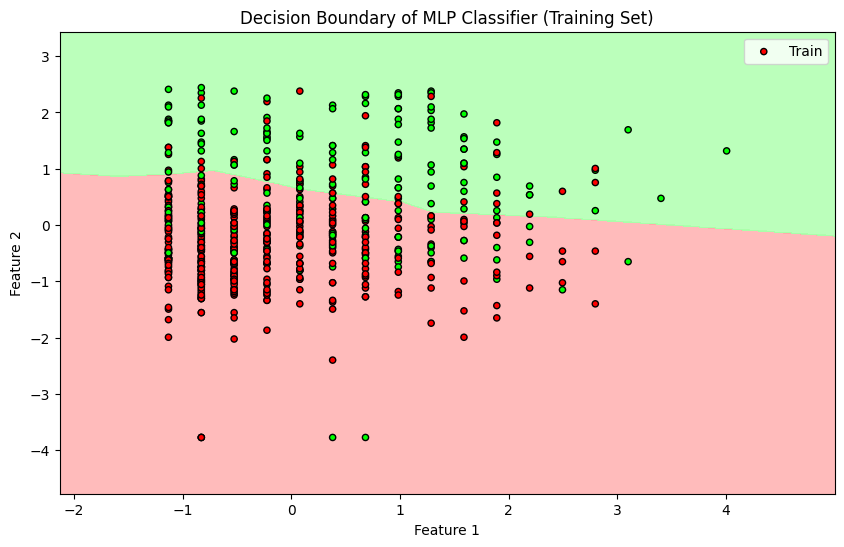

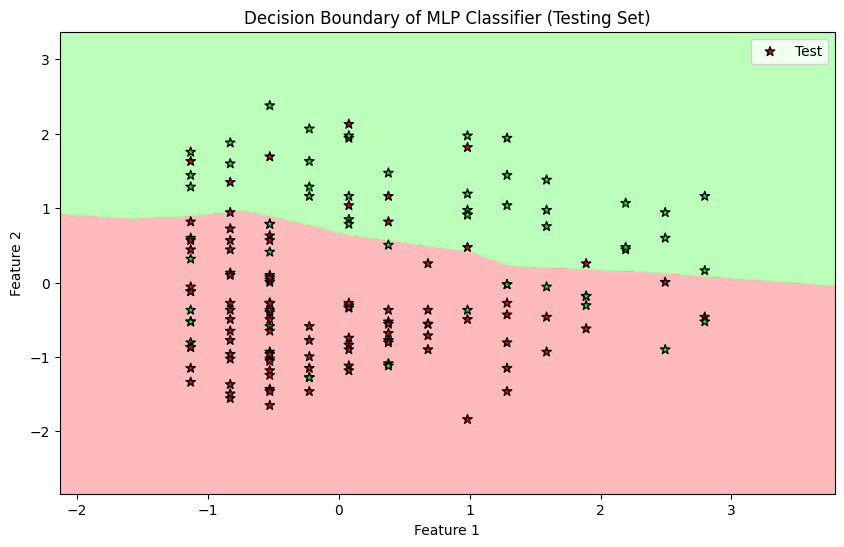

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load the diabetes dataset
df = pd.read_csv("diabetes.csv")  # Replace with the correct path to your dataset

# Use the first two features for 2D visualization
X = df.iloc[:, :-1].values[:, :2]  # Using first two features
y = df.iloc[:, -1].values  # Target labels (diabetes: 1, non-diabetes: 0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

# Train the MLP classifier
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot decision boundaries for training set
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z_train = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z_train = Z_train.reshape(xx.shape)

# Define color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_train, alpha=0.8, cmap=cmap_light)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20, label='Train')
plt.title("Decision Boundary of MLP Classifier (Training Set)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Plot decision boundaries for testing set
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z_test = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z_test = Z_test.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_test, alpha=0.8, cmap=cmap_light)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=50, label='Test', marker='*')
plt.title("Decision Boundary of MLP Classifier (Testing Set)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


## **Keras Implementation of MultiLayer Perceptron(MLP)**

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6139 - loss: 0.6550 - val_accuracy: 0.6748 - val_loss: 0.6187
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7355 - loss: 0.5983 - val_accuracy: 0.6992 - val_loss: 0.5882
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7543 - loss: 0.5589 - val_accuracy: 0.7317 - val_loss: 0.5589
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7657 - loss: 0.5254 - val_accuracy: 0.7480 - val_loss: 0.5363
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7692 - loss: 0.4998 - val_accuracy: 0.7561 - val_loss: 0.5237
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7514 - loss: 0.5037 - val_accuracy: 0.7642 - val_loss: 0.5079
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7607 - loss: 0.4767 - val_accuracy: 0.7398 - val_loss: 0.4971
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7649 - loss: 0.4737 - val_accuracy: 0.7561 - val_loss: 0.4921


1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        99
           1       0.65      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.75      0.75       154



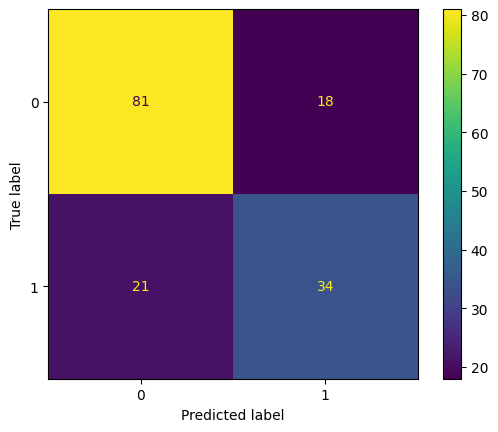

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Load the diabetes dataset
df = pd.read_csv("diabetes.csv")

# Select the features and target (assuming last column is target)
X = df.iloc[:, :-1].values  # Features (all columns except last)
y = df.iloc[:, -1].values   # Target (last column)

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (helps with convergence and performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit the scaler on training data and transform it
X_test = scaler.transform(X_test)  # Transform the testing data using the same scaler

# Step 2: Build the ANN model
model = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),  # Hidden layer with 32 neurons and ReLU activation       no.of columnsfor 1 and no. of rows for zero
    Dense(16, activation='relu'),  # Another hidden layer with 16 neurons and ReLU activation
    Dense(1, activation='sigmoid')  # Output layer with 1 neuron and sigmoid activation for binary classification
])

# Step 3: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Step 5: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Step 6: Generate predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Step 7: Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 8: Visualize confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


## **Backward Propogation from Sratch**

Epoch 0: Error = 0.123158
Epoch 30: Error = 0.080520
Epoch 60: Error = 0.077289
Epoch 90: Error = 0.076307
Epoch 120: Error = 0.075513
Epoch 150: Error = 0.075071
Epoch 180: Error = 0.074854
Epoch 210: Error = 0.074694
Epoch 240: Error = 0.074562
Epoch 270: Error = 0.074449
Epoch 300: Error = 0.074349
Epoch 330: Error = 0.074260
Epoch 360: Error = 0.074180
Epoch 390: Error = 0.074105
Epoch 420: Error = 0.074036
Epoch 450: Error = 0.073971
Epoch 480: Error = 0.073909


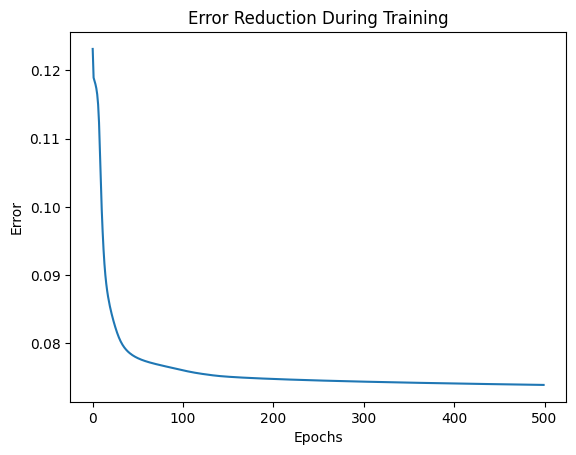

Final Predictions on Test Data: [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


In [8]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Sigmoid Activation Function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# Derivative of Sigmoid Function
def sigmoid_derivative(x):
    return x * (1 - x)

# Feedforward function
def feed_forward(b1, b2, w1, w2, x):
    hidden = []
    output = []

    # Hidden Layer Activation
    for i in range(4):  # 4 neurons in the hidden layer
        hidden.append(sigmoid(b1 + sum(w1[i][j] * x[j] for j in range(len(x)))))

    # Output Layer Activation
    for i in range(1):  # Binary classification (1 output)
        output.append(sigmoid(b2 + sum(w2[i][j] * hidden[j] for j in range(len(hidden)))))

    return hidden, output

# Error Calculation
def find_error(output, desired):
    return sum((np.array(output) - np.array(desired))**2) / 2  # MSE

# Backpropagation
def back_propagate(w1, w2, hidden, output, desired, x, alpha):
    # Compute error terms for output layer
    delta_output = [(output[i] - desired[i]) * sigmoid_derivative(output[i]) for i in range(len(output))]

    # Compute error terms for hidden layer
    delta_hidden = []
    for i in range(len(hidden)):
        temp = sum(delta_output[j] * w2[j][i] for j in range(len(output)))
        delta_hidden.append(temp * sigmoid_derivative(hidden[i]))

    # Update weights for hidden-to-output layer
    for i in range(len(output)):
        for j in range(len(hidden)):
            w2[i][j] -= alpha * delta_output[i] * hidden[j]

    # Update weights for input-to-hidden layer
    for i in range(len(hidden)):
        for j in range(len(x)):
            w1[i][j] -= alpha * delta_hidden[i] * x[j]

# Load dataset
df = pd.read_csv("diabetes.csv")

# Split dataset
X = df.drop(columns=['Outcome']).values
y = df['Outcome'].values.reshape(-1, 1)

# Normalize data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize parameters
input_size = X_train.shape[1]  # Number of input features
hidden_size = 4  # Hidden layer neurons
output_size = 1  # Binary classification

np.random.seed(42)
w1 = np.random.rand(hidden_size, input_size).tolist()  # Weights from input to hidden
w2 = np.random.rand(output_size, hidden_size).tolist()  # Weights from hidden to output
b1 = np.random.rand()  # Bias for hidden layer
b2 = np.random.rand()  # Bias for output layer
alpha = 0.5  # Learning rate
epochs = 500  # Training iterations
error = []

# Training loop
for epoch in range(epochs):
    total_error = 0
    for i in range(len(X_train)):
        x_sample = X_train[i]
        y_sample = y_train[i]

        hidden, output = feed_forward(b1, b2, w1, w2, x_sample)  # Forward pass
        total_error += find_error(output, y_sample)  # Compute error

        back_propagate(w1, w2, hidden, output, y_sample, x_sample, alpha)  # Backpropagation step

    error.append(total_error / len(X_train))

    # Print loss every 10 epochs
    if epoch % 30 == 0:
        print(f"Epoch {epoch}: Error = {total_error / len(X_train):.6f}")

# Plot error reduction
plt.plot(error)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Error Reduction During Training")
plt.show()

# Final Output after Training
predictions = []
for i in range(len(X_test)):
    _, output_test = feed_forward(b1, b2, w1, w2, X_test[i])
    predictions.append(1 if output_test[0] > 0.5 else 0)

print("Final Predictions on Test Data:", predictions)
